Assignment 6 - Normality Test and Central Limit Theorem - 18 December 2023

For a particular player (e.g. SR Tendulkar), check if his scores follow normal distribution. (Hint: Use Shapiro test, Draw a Q-Q plot).

Use CLT to see if it is true for this data. Draw visualizations if necessary.

Compare Sachin Tendulkar's batting average with the Indian team's total batting average. Use a Z-test to assess the statistical significance of the difference. Display the Z-score and p-value (Hint: Use the ztest() function).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [31]:
odi_20 = pd.read_csv("D:\CDAC\Advance Statistics\Datasets\Men ODI Player Innings Stats - 20th Century.csv")
odi_21 = pd.read_csv("D:\CDAC\Advance Statistics\Datasets\Men ODI Player Innings Stats - 21st Century.csv")

df = pd.concat([odi_20,odi_21],axis=0)
df

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,RA Smith,167*,167,208,1.0,1.0,163,17,3,102.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DI Gower,158,158,177,1.0,0.0,118,18,4,133.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CWJ Athey,142*,142,208,1.0,1.0,172,14,0,82.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GA Gooch,142,142,-,1.0,0.0,134,14,0,105.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DL Amiss,137,137,-,1.0,0.0,147,18,0,93.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327323,Najibullah Zadran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
327324,Rahmat Shah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
327325,Hazratullah Zazai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-
327326,Ibrahim Zadran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-


In [32]:
df_sachin = df[df["Innings Player"] == "SR Tendulkar"]

In [33]:
df_sachin["Innings Runs Scored Num"].unique()

array(['186', '146', '143', '141', '140', '137', '134', '128', '127',
       '124', '122', '120', '118', '117', '115', '114', '112', '110',
       '105', '104', '101', '100', '95', '93', '91', '90', '89', '88',
       '85', '84', '82', '81', '80', '77', '73', '70', '69', '67', '66',
       '65', '64', '63', '62', '61', '57', '54', '53', '52', '51', '49',
       '48', '47', '45', '44', '41', '40', '39', '38', '37', '36', '35',
       '34', '33', '32', '31', '30', '29', '28', '27', '26', '25', '24',
       '23', '22', '21', '20', '19', '18', '17', '16', '15', '14', '13',
       '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0',
       '-', nan, '200', '175', '163', '152', '139', '138', '123', '113',
       '111', '102', '99', '98', '97', '96', '94', '87', '86', '83', '79',
       '78', '74', '72', '71', '68', '60', '55', '50', '46', '43', '42'],
      dtype=object)

In [34]:
df_sachin = df_sachin[(df_sachin["Innings Runs Scored Num"] != "-")]
df_sachin.value_counts()

Series([], dtype: int64)

In [35]:
df_new_sachin =df_sachin["Innings Runs Scored Num"].dropna()

In [36]:
df_new_sachin

30591     186
30597     146
30600     143
30602     141
30604     140
         ... 
260424      0
260446      0
260451      0
260462      0
260474      0
Name: Innings Runs Scored Num, Length: 844, dtype: object

In [37]:
mean_sachin = np.mean(df_new_sachin.astype(int))
mean_sachin
sd_sachin = np.std(df_new_sachin.astype(int))
sd_sachin
zScore_sachin = (df_new_sachin.astype(int) - mean_sachin) / sd_sachin
zScore_sachin = np.array(zScore_sachin)
print(zScore_sachin)

[ 3.51186600e+00  2.53609075e+00  2.46290760e+00  2.41411884e+00
  2.38972446e+00  2.31654132e+00  2.24335817e+00  2.09699188e+00
  2.07259750e+00  2.07259750e+00  1.99941436e+00  1.95062560e+00
  1.90183683e+00  1.85304807e+00  1.85304807e+00  1.82865369e+00
  1.77986493e+00  1.75547055e+00  1.70668178e+00  1.65789302e+00
  1.65789302e+00  1.53592111e+00  1.51152673e+00  1.43834359e+00
  1.41394921e+00  1.41394921e+00  1.41394921e+00  1.29197730e+00
  1.24318854e+00  1.24318854e+00  1.24318854e+00  1.19439978e+00
  1.17000540e+00  1.14561101e+00  1.12121663e+00  1.12121663e+00
  1.04803349e+00  1.02363911e+00  9.74850345e-01  9.74850345e-01
  9.74850345e-01  9.50455964e-01  9.26061583e-01  8.52878439e-01
  8.52878439e-01  7.55300914e-01  6.82117770e-01  6.57723389e-01
  6.57723389e-01  6.08934626e-01  6.08934626e-01  5.84540245e-01
  5.60145864e-01  5.60145864e-01  5.60145864e-01  5.60145864e-01
  5.35751482e-01  5.11357101e-01  5.11357101e-01  4.86962720e-01
  4.86962720e-01  4.86962

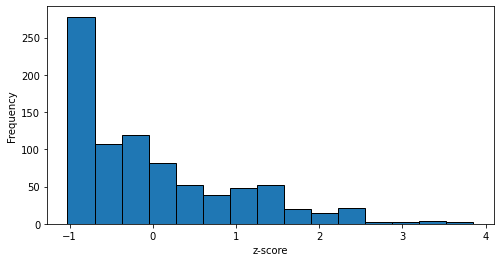

In [38]:
plt.figure(figsize=(8,4))
plt.hist(zScore_sachin, bins=15, edgecolor='black')
plt.xlabel("z-score")
plt.ylabel("Frequency")
plt.show()

In [39]:
#There are duplicate records
df_no_duplicates = df.drop_duplicates(subset=['Innings Player','Innings Date'])
df = df_no_duplicates.copy()

In [40]:
df

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,RA Smith,167*,167,208,1.0,1.0,163,17,3,102.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DI Gower,158,158,177,1.0,0.0,118,18,4,133.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CWJ Athey,142*,142,208,1.0,1.0,172,14,0,82.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GA Gooch,142,142,-,1.0,0.0,134,14,0,105.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DL Amiss,137,137,-,1.0,0.0,147,18,0,93.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103462,Sharafuddin Ashraf,DNB,-,-,0.0,0.0,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103463,Mujeeb Ur Rahman,DNB,-,-,0.0,0.0,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103464,Yamin Ahmadzai,DNB,-,-,0.0,0.0,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107710,PL Mommsen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DNB,0.0,-,-,-,1.0,0.0,0.0,-,-


In [41]:
#convert score to integer
df['Innings Runs Scored Num'] = pd.to_numeric(df['Innings Runs Scored Num'], errors='coerce')
df = df.dropna(subset=['Innings Runs Scored Num']).astype({'Innings Runs Scored Num' : 'int'})

In [42]:
df

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,RA Smith,167*,167,208,1.0,1.0,163,17,3,102.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DI Gower,158,158,177,1.0,0.0,118,18,4,133.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CWJ Athey,142*,142,208,1.0,1.0,172,14,0,82.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GA Gooch,142,142,-,1.0,0.0,134,14,0,105.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DL Amiss,137,137,-,1.0,0.0,147,18,0,93.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103247,Najibullah Zadran,0,0,-,1.0,0.0,3,0,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103248,Rashid Khan,0,0,-,1.0,0.0,2,0,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103249,Javed Ahmadi,0,0,-,1.0,0.0,4,0,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103250,Mujeeb Ur Rahman,0,0,-,1.0,0.0,3,0,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[ 3.63130185  2.63118094  2.55617187  2.50616583  2.4811628   2.40615373
  2.33114467  2.18112653  2.15612351  2.15612351  2.08111444  2.03110839
  1.98110235  1.9310963   1.9310963   1.90609328  1.85608723  1.83108421
  1.78107816  1.73107212  1.73107212  1.606057    1.58105398  1.50604491
  1.48104189  1.48104189  1.48104189  1.35602677  1.30602073  1.30602073
  1.30602073  1.25601468  1.23101166  1.20600864  1.18100561  1.18100561
  1.10599655  1.08099352  1.03098748  1.03098748  1.03098748  1.00598445
  0.98098143  0.90597236  0.90597236  0.80596027  0.7309512   0.70594818
  0.70594818  0.65594213  0.65594213  0.63093911  0.60593609  0.60593609
  0.60593609  0.60593609  0.58093307  0.55593004  0.55593004  0.53092702
  0.53092702  0.53092702  0.53092702  0.505924    0.40591191  0.40591191
  0.40591191  0.33090284  0.33090284  0.33090284  0.30589981  0.30589981
  0.30589981  0.30589981  0.28089679  0.28089679  0.25589377  0.20588772
  0.1808847   0.1808847   0.15588168  0.10587563  0

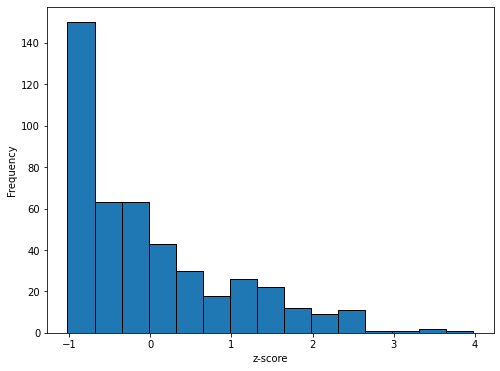

In [43]:

df_sachin = df[df["Innings Player"] == "SR Tendulkar"]
df_sachin["Innings Runs Scored Num"].unique()
df_sachin = df_sachin[(df_sachin["Innings Runs Scored Num"] != "-")]
df_sachin.value_counts()
df_new_sachin = df_sachin["Innings Runs Scored Num"].dropna()
df_new_sachin
mean_sachin = np.mean(df_new_sachin.astype(int))
mean_sachin
sd_sachin = np.std(df_new_sachin.astype(int))
sd_sachin
zScore_sachin = (df_new_sachin.astype(int) - mean_sachin) / sd_sachin
zScore_sachin = np.array(zScore_sachin)
print(zScore_sachin)
plt.figure(figsize=(8, 6))
plt.hist(zScore_sachin, bins=15, edgecolor='black')
plt.xlabel("z-score")
plt.ylabel("Frequency")
plt.show()

[ 3.0965511   2.56245191  2.49278679  2.42312168  2.09801782  2.07479612
  2.05157441  2.005131    1.93546589  1.88902248  1.84257907  1.81935737
  1.79613567  1.70324885  1.70324885  1.68002714  1.65680544  1.63358374
  1.58714033  1.56391862  1.56391862  1.54069692  1.51747522  1.51747522
  1.49425351  1.47103181  1.4478101   1.4478101   1.4245884   1.40136669
  1.35492329  1.33170158  1.33170158  1.33170158  1.33170158  1.30847988
  1.30847988  1.28525817  1.26203647  1.21559306  1.21559306  1.16914965
  1.16914965  1.14592795  1.07626284  1.02981943  0.98337602  0.96015431
  0.96015431  0.91371091  0.8672675   0.8672675   0.84404579  0.84404579
  0.82082409  0.82082409  0.75115898  0.75115898  0.75115898  0.75115898
  0.72793727  0.72793727  0.70471557  0.68149386  0.65827216  0.65827216
  0.63505046  0.63505046  0.63505046  0.63505046  0.61182875  0.58860705
  0.58860705  0.51894193  0.49572023  0.49572023  0.42605512  0.42605512
  0.42605512  0.40283341  0.37961171  0.37961171  0

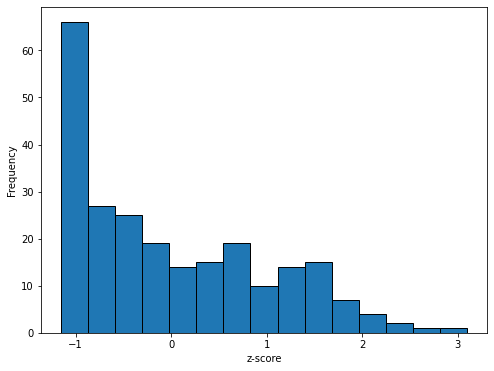

In [44]:
df_selected_player = df[df["Innings Player"] == "V Kohli"]
df_selected_player["Innings Runs Scored Num"].unique()
df_selected_player = df_selected_player[(df_selected_player["Innings Runs Scored Num"] != "-")]
df_selected_player.value_counts()
df_selected_new_player = df_selected_player["Innings Runs Scored Num"].dropna()
df_selected_new_player
mean_selected_player = np.mean(df_selected_new_player.astype(int))
mean_selected_player
sd_selected_player = np.std(df_selected_new_player.astype(int))
sd_selected_player
zScore_sachin = (df_selected_new_player.astype(int) - mean_selected_player) / sd_selected_player
zScore_sachin = np.array(zScore_sachin)
print(zScore_sachin)
plt.figure(figsize=(8, 6))
plt.hist(zScore_sachin, bins=15, edgecolor='black')
plt.xlabel("z-score")
plt.ylabel("Frequency")
plt.show()

In [45]:

df_selected_new_player = pd.DataFrame(df_selected_new_player)
df_selected_new_player.reset_index(inplace=True)
df_selected_new_player

,index,Innings Runs Scored Num
0,38091,183
1,38097,160
2,38100,157
3,38101,154
4,38116,140
...,...,...
234,42297,0
235,42305,0
236,42332,0
237,42337,0


In [46]:
import scipy.stats as stats

shapiro_test = stats.shapiro(df_selected_new_player["Innings Runs Scored Num"])
print("Shapiro_lik p-value: ", shapiro_test.pvalue)

Shapiro_lik p-value:  9.486270796665863e-11


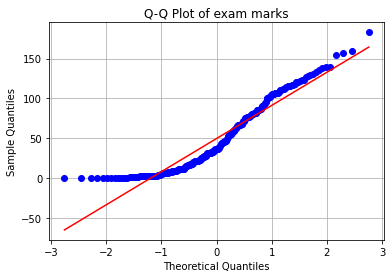

In [47]:
# Q-Q Plot
stats.probplot(df_selected_new_player["Innings Runs Scored Num"], fit=stats.norm, plot=plt)
plt.title("Q-Q Plot of exam marks")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

In [48]:
# Interpretation 
if shapiro_test.pvalue <0.05:
    print("The data likely does not follow a normal distribution.")
else:
    print("The data may be normally distributed, but the q-q plot can provide further insights.")
    

The data likely does not follow a normal distribution.


In [49]:
mean_list= [df_selected_new_player["Innings Runs Scored Num"].sample(216,replace=False).mean() for i in range(100) ]
mean_list

[49.39351851851852,
 49.592592592592595,
 49.26851851851852,
 49.06018518518518,
 49.763888888888886,
 49.25,
 49.675925925925924,
 52.379629629629626,
 49.0,
 50.88425925925926,
 48.68518518518518,
 50.120370370370374,
 50.023148148148145,
 50.60648148148148,
 49.0462962962963,
 51.41203703703704,
 51.2037037037037,
 51.97222222222222,
 49.370370370370374,
 50.00925925925926,
 51.11574074074074,
 48.30555555555556,
 49.666666666666664,
 49.84722222222222,
 50.083333333333336,
 49.407407407407405,
 50.23148148148148,
 49.63425925925926,
 50.72222222222222,
 49.583333333333336,
 50.34722222222222,
 50.99074074074074,
 49.3287037037037,
 48.72222222222222,
 49.6712962962963,
 48.80555555555556,
 50.388888888888886,
 51.013888888888886,
 49.73148148148148,
 49.10648148148148,
 48.72222222222222,
 49.48148148148148,
 49.342592592592595,
 47.666666666666664,
 50.648148148148145,
 51.407407407407405,
 49.15277777777778,
 47.22222222222222,
 50.24074074074074,
 50.16203703703704,
 49.42129629

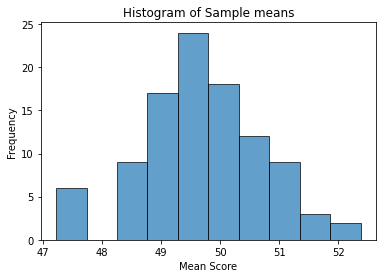

In [50]:
plt.hist(mean_list,bins=10,edgecolor='k',alpha=0.7)
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sample means')
plt.show()

In [51]:
df_Team_India = df[df["Country"] == "India"]
df_Team_India["Innings Runs Scored Num"].unique()
df_Team_India = df_Team_India[(df_Team_India["Innings Runs Scored Num"] != "-")]
df_Team_India.value_counts()
df_Team_India = df_Team_India["Innings Runs Scored Num"].dropna()
df_Team_India

30591    186
30592    183
30593    175
30594    153
30595    153
        ... 
42363      0
42364      0
42365      0
42366      0
42367      0
Name: Innings Runs Scored Num, Length: 8137, dtype: int32

In [52]:
Avg_Team_IND = np.mean(df_Team_India.astype(int))
Avg_Team_IND

25.255376674450044

In [53]:
df_Team_India
df_Team_India = pd.DataFrame(df_Team_India)
df_Team_India.reset_index(inplace=True)
df_Team_India

,index,Innings Runs Scored Num
0,30591,186
1,30592,183
2,30593,175
3,30594,153
4,30595,153
...,...,...
8132,42363,0
8133,42364,0
8134,42365,0
8135,42366,0


In [54]:
print(mean_selected_player,Avg_Team_IND)
diff =  Avg_Team_IND
print(diff)

49.65271966527197 25.255376674450044
25.255376674450044


In [55]:

from statsmodels.stats.weightstats import ztest


In [56]:
z_statistic, p_value = ztest(x1=df_selected_new_player["Innings Runs Scored Num"],value=diff)
print(z_statistic,p_value)

8.74027504135068 2.3254358875130603e-18
